# 1. 패키지 및 한글 불러옴

In [ ]:
# 한글 불러옴
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update -qq
!apt-get install fonts-nanum* -qq

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,962 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and dire

In [ ]:
# 런타임 다시 시작

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# 나눔고딕 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family='NanumGothic')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.cluster import KMeans

# 2 음주 데이터 가져오기

In [ ]:
drunk_area_raw = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/3 음주/3 음주운전 다발지역.csv',
                 encoding='euc-kr')
drink_status_raw = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/3 음주/4 자치구별, 음주시태별, 성별, 시점+음주실태(2003-2006).csv',
                 encoding='utf-8')
drink_rate_raw = pd.read_csv('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/도연_data/3 음주/2021년 지역별_생애주기별_직업별 고위험+음주율_2024.csv',
                 encoding='utf-8')


## 1) 음주운전 다발지역

In [ ]:
# '사고다발지id', '법정동코드', '지점코드', '다발지역폴리곤' 열 제거
drunk_area_proc = drunk_area_raw.drop(columns=['사고다발지id', '법정동코드', '지점코드', '부상신고자수','다발지역폴리곤'])


In [ ]:
# '시도시군구명'에서 '서울'을 포함한 데이터만 선택
drunk_area_proc = drunk_area_proc[drunk_area_proc['시도시군구명'].str.contains('서울')]

# 결과 확인
print(drunk_area_proc.describe())

           사고다발지fid        사고건수        사상자수        사망자수        중상자수  \
count  1.680000e+02  168.000000  168.000000  168.000000  168.000000   
mean   6.802650e+06    3.297619    6.577381    0.041667    3.863095   
std    1.213463e+04    0.730511    2.879822    0.200424    1.271171   
min    6.789424e+06    3.000000    3.000000    0.000000    2.000000   
25%    6.789636e+06    3.000000    4.000000    0.000000    3.000000   
50%    6.792453e+06    3.000000    6.000000    0.000000    3.000000   
75%    6.814854e+06    3.000000    9.000000    0.000000    4.000000   
max    6.815041e+06    7.000000   18.000000    1.000000   10.000000   

             경상자수          경도          위도  
count  168.000000  168.000000  168.000000  
mean     2.535714  126.989414   37.530130  
std      2.182930    0.084626    0.044307  
min      0.000000  126.826880   37.454779  
25%      1.000000  126.914391   37.498726  
50%      2.000000  127.021847   37.520971  
75%      4.000000  127.045623   37.553921  
max     

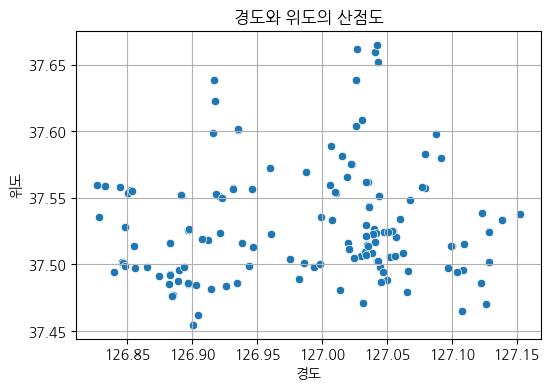

In [ ]:
# 경도와 위도 데이터 추출
longitude = drunk_area_proc['경도']
latitude = drunk_area_proc['위도']

# 산점도 시각화
plt.figure(figsize=(6, 4))
sns.scatterplot(x=longitude, y=latitude)
plt.title('경도와 위도의 산점도')
plt.xlabel('경도')
plt.ylabel('위도')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


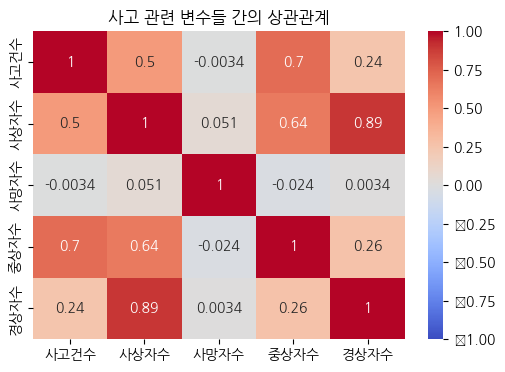

In [ ]:
# 각 열의 상관관계 분석

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 로드 (예시 데이터프레임 drunk_area_proc 사용)
# drunk_area_proc = pd.read_csv('your_file.csv')

# 분석에 사용할 열 선택
columns_to_analyze = ['사고건수', '사상자수', '사망자수', '중상자수', '경상자수' ]

# 선택한 열만 따로 추출
df_analysis = drunk_area_proc[columns_to_analyze]

# 상관계수 계산
correlation_matrix = df_analysis.corr()

# 히트맵 시각화
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('사고 관련 변수들 간의 상관관계')
plt.show()


In [ ]:
# K-means 클러스터링
X = drunk_area_proc[['사망자수', '중상자수', '경상자수']]
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# 클러스터링 결과와 클러스터별 중심값 출력
drunk_area_proc['Cluster'] = kmeans.labels_

# 클러스터별 사망자수, 중상자수, 경상자수의 평균 계산
cluster_stats = drunk_area_proc.groupby('Cluster')[['사망자수', '중상자수', '경상자수']].mean()

print("\n각 클러스터별 사망자수, 중상자수, 경상자수 평균:")
print(cluster_stats)

drunk_area_proc = drunk_area_proc.rename(columns={'Cluster': '사고심각도'})
# 클러스터 0: 치명적 사고
# 클러스터 1: 경미한 사고
# 클러스터 2: 0~1사이 사고
# 지역기준으로 딱히 공통점이 없어보임..

# 데이터프레임에 클러스터 번호 추가 확인
print("\n클러스터링 결과를 포함한 데이터프레임:")
print(drunk_area_proc)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



각 클러스터별 사망자수, 중상자수, 경상자수 평균:
             사망자수      중상자수      경상자수
Cluster                              
0        0.052632  3.578947  0.968421
1        0.000000  4.588235  7.000000
2        0.035714  4.125000  3.839286

클러스터링 결과를 포함한 데이터프레임:
     사고다발지fid      시도시군구명                         지점명  사고건수  사상자수  사망자수  중상자수  \
0     6789498  서울특별시 종로구1   서울특별시 종로구 숭인동(신설동역교차로 부근)     3     4     0     4   
1     6792429   서울특별시 중구1   서울특별시 중구 장충동1가(장충체육관앞 부근)     3     5     0     3   
2     6792345   서울특별시 중구2   서울특별시 중구 신당동(약수역서울3호선 부근)     3     5     0     3   
3     6789599  서울특별시 용산구1  서울특별시 용산구 한강로3가(한강대교북측 부근)     3     9     0     4   
4     6789490  서울특별시 성동구1    서울특별시 성동구 성수동1가(성수대교 부근)     4    12     0     7   
..        ...         ...                         ...   ...   ...   ...   ...   
413   6814875  서울특별시 송파구2    서울특별시 송파구 잠실동(잠실역사거리 부근)     3     4     0     3   
414   6814954  서울특별시 송파구3  서울특별시 송파구 장지동(복정역 앞교차로 부근)     3     4     0     3   
415   6814706  서울특별시 강동구1   

In [ ]:
# 행정동 코드 배치
import geopandas as gpd
from shapely.geometry import Point

drunk_area_proc
gdf_dong = gpd.read_file('/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/소현_유동인구 상권 및 시설 위치/행정동경계.geojson')

drunk_area_proc['geometry'] = drunk_area_proc.apply(lambda row: Point([row['경도'], row['위도']]), axis=1)
gdf_points = gpd.GeoDataFrame(drunk_area_proc, geometry='geometry')
gdf_points.crs = {'init': 'epsg:4326'}

gdf_dong = gdf_dong.to_crs(epsg=4326)
gdf_result = gpd.sjoin(gdf_points, gdf_dong, how='left', op = 'within')
print(gdf_result[['경도', '위도', 'temp', 'adm_cd2']])



/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-8-c48510fc93af>:13: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  gdf_result = gpd.sjoin(gdf_points, gdf_dong, how='left', op = 'with

             경도         위도        temp     adm_cd2
0    127.023122  37.575433    종로구 숭인2동  1111071000
1    127.005786  37.559678      중구 장충동  1114058000
2    127.010806  37.553750      중구 약수동  1114063500
3    126.960990  37.522527    용산구 이촌2동  1117064000
4    127.036229  37.543578  성동구 성수1가1동  1120065000
..          ...        ...         ...         ...
413  127.099770  37.513669    송파구 잠실3동  1171068000
414  127.126690  37.470311     송파구 위례동  1171064700
415  127.138825  37.533625    강동구 둔촌2동  1174070000
416  127.152675  37.538200    강동구 둔촌2동  1174070000
417  127.122953  37.538803    강동구 천호2동  1174061000

[168 rows x 4 columns]


In [ ]:
final_columns= ['사고다발지fid',	'시도시군구명',	'지점명',	'사고건수',	'사상자수',	'사망자수',	'중상자수','경상자수', '사고심각도','경도', '위도', 'temp', 'adm_cd2']
gdf_final = gdf_result[final_columns]
gdf_final.head()


,사고다발지fid,시도시군구명,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,사고심각도,경도,위도,temp,adm_cd2
0,6789498,서울특별시 종로구1,서울특별시 종로구 숭인동(신설동역교차로 부근),3,4,0,4,0,0,127.023122,37.575433,종로구 숭인2동,1111071000
1,6792429,서울특별시 중구1,서울특별시 중구 장충동1가(장충체육관앞 부근),3,5,0,3,2,0,127.005786,37.559678,중구 장충동,1114058000
2,6792345,서울특별시 중구2,서울특별시 중구 신당동(약수역서울3호선 부근),3,5,0,3,2,0,127.010806,37.553750,중구 약수동,1114063500
3,6789599,서울특별시 용산구1,서울특별시 용산구 한강로3가(한강대교북측 부근),3,9,0,4,5,2,126.960990,37.522527,용산구 이촌2동,1117064000
4,6789490,서울특별시 성동구1,서울특별시 성동구 성수동1가(성수대교 부근),4,12,0,7,5,2,127.036229,37.543578,성동구 성수1가1동,1120065000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,6814875,서울특별시 송파구2,서울특별시 송파구 잠실동(잠실역사거리 부근),3,4,0,3,1,0,127.099770,37.513669,송파구 잠실3동,1171068000
414,6814954,서울특별시 송파구3,서울특별시 송파구 장지동(복정역 앞교차로 부근),3,4,0,3,0,0,127.126690,37.470311,송파구 위례동,1171064700
415,6814706,서울특별시 강동구1,서울특별시 강동구 둔촌동(길동사거리 부근),5,11,0,6,5,2,127.138825,37.533625,강동구 둔촌2동,1174070000
416,6814850,서울특별시 강동구2,서울특별시 강동구 길동(생태공원앞교차로 부근),3,12,0,3,8,1,127.152675,37.538200,강동구 둔촌2동,1174070000


In [ ]:
# adm_cd2 열 기준으로 사고건수 총합 구하기
result = gdf_final.groupby('adm_cd2')['사고건수'].sum().reset_index()
print("\nGrouped DataFrame with Total Accident Counts:")
print(result)




Grouped DataFrame with Total Accident Counts:
        adm_cd2  사고건수
0    1111058000     4
1    1111061500     3
2    1111070000     3
3    1111071000     6
4    1114058000     3
..          ...   ...
96   1171068000     3
97   1171071000     3
98   1174061000     6
99   1174064000     3
100  1174070000    11

[101 rows x 2 columns]


In [ ]:
file_path = '/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0행정동코드별 사고건수.csv'
result.to_csv(file_path, index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [ ]:
# 하나의 변수로 압축

import pandas as pd
import geopandas as gpd
from sklearn.decomposition import PCA

# PCA 적용을 위해 데이터 정규화 (Standardization)
pca_columns = ['사고건수','사상자수', '사망자수','중상자수']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(gdf_final[pca_columns])

# PCA 적용
pca = PCA(n_components=1)
gdf_final['종합사고지수'] = pca.fit_transform(scaled_data)

# 종합사고지수를 기준으로 내림차순 정렬
sorted_df = gdf_final.sort_values(by='종합사고지수', ascending=False)

# 결과 출력
sorted_df


<ipython-input-12-c0dd33d4e38e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_final['종합사고지수'] = pca.fit_transform(scaled_data)


,사고다발지fid,시도시군구명,지점명,사고건수,사상자수,사망자수,중상자수,경상자수,사고심각도,경도,위도,temp,adm_cd2,종합사고지수
58,6789453,서울특별시 강남구3,서울특별시 강남구 역삼동(경복아파트교차로 부근),5,18,0,10,8,1,127.038256,37.508613,강남구 역삼1동,1168064000,6.474944
47,6789427,서울특별시 관악구1,서울특별시 관악구 신림동(난곡사거리 부근),5,18,0,8,10,1,126.914231,37.481744,관악구 미성동,1162076500,5.510729
390,6814704,서울특별시 강남구1,서울특별시 강남구 청담동(청담스퀘어 부근),7,11,0,7,4,2,127.041323,37.523371,강남구 청담동,1168056500,5.252292
391,6814705,서울특별시 강남구2,서울특별시 강남구 논현동(교보타워사거리 부근),7,10,0,7,3,2,127.024466,37.504737,강남구 논현1동,1168052100,5.060827
392,6814708,서울특별시 강남구3,서울특별시 강남구 청담동(청담사거리 부근),6,10,0,8,1,0,127.047427,37.524476,강남구 청담동,1168056500,4.760974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,6814905,서울특별시 구로구5,서울특별시 구로구 구로동(구로1치안센터 부근),3,3,0,3,0,0,126.874554,37.491239,구로구 구로1동,1153052000,-1.335694
41,6792403,서울특별시 영등포구3,서울특별시 영등포구 당산동3가(서림빌딩 부근),3,3,0,3,0,0,126.896908,37.526183,영등포구 당산1동,1156055000,-1.335694
42,6789587,서울특별시 영등포구4,서울특별시 영등포구 대림동(거리공원오거리 부근),3,3,0,3,0,0,126.893289,37.497862,구로구 구로5동,1153056000,-1.335694
38,6792347,서울특별시 금천구2,서울특별시 금천구 가산동(월드메르디앙벤처센타 부근),3,3,0,3,0,0,126.884863,37.476907,금천구 가산동,1154551000,-1.335694


In [ ]:

# 각 변수의 기여도 확인
loading_vectors = pca.components_[0]
contributions = pd.Series(loading_vectors, index=pca_columns, name='기여도')

# 기여도 출력
print(contributions)

사고건수    0.569528
사상자수    0.549740
사망자수    0.009220
중상자수    0.611014
Name: 기여도, dtype: float64


In [ ]:

# adm_cd2 값으로 그룹화하여 사고건수, 종합사고지수의 평균 계산
grouped_df = sorted_df.groupby(['adm_cd2', 'temp']).agg({
    '사고건수': 'mean',
    '종합사고지수': 'mean'
}).reset_index()

# 결과 출력
print(grouped_df)

        adm_cd2             temp      사고건수    종합사고지수
0    1111058000          종로구 교남동  4.000000  1.750731
1    1111061500  종로구 종로1·2·3·4가동  3.000000 -0.952766
2    1111070000         종로구 숭인1동  3.000000 -0.662123
3    1111071000         종로구 숭인2동  3.000000 -0.998909
4    1114058000           중구 장충동  3.000000 -0.952766
..          ...              ...       ...       ...
96   1171068000         송파구 잠실3동  3.000000 -1.144230
97   1171071000         송파구 잠실6동  3.000000 -1.144230
98   1174061000         강동구 천호2동  3.000000 -0.761301
99   1174064000         강동구 성내1동  3.000000 -0.952766
100  1174070000         강동구 둔촌2동  3.666667  0.944149

[101 rows x 4 columns]


In [ ]:
grouped_df = grouped_df.sort_values(by='종합사고지수', ascending=False)
grouped_df

,adm_cd2,temp,사고건수,종합사고지수
68,1162076500,관악구 미성동,5.000000,5.510729
77,1168052100,강남구 논현1동,5.000000,2.374287
94,1171064200,송파구 문정2동,4.000000,2.133660
80,1168056500,강남구 청담동,4.727273,2.050579
91,1171060000,송파구 석촌동,4.000000,2.041374
...,...,...,...,...
13,1120072000,성동구 송정동,3.000000,-1.335694
58,1156055000,영등포구 당산1동,3.000000,-1.335694
45,1153052000,구로구 구로1동,3.000000,-1.335694
50,1153072000,구로구 고척1동,3.000000,-1.335694


## 2) 자치구별 음주 실태별

2006년도 데이터 사용안함

In [ ]:
drink_status_raw.describe(include='all')

,자치구별(1),음주실태별(1),음주실태별(2),성별(1),2006
count,624,624,624,624,624.000000
unique,26,4,6,3,NaN
top,서울시,음주정도,소계,전체,NaN
freq,24,390,234,208,NaN
mean,NaN,NaN,NaN,NaN,19.336699
std,NaN,NaN,NaN,NaN,19.426324
min,NaN,NaN,NaN,NaN,0.100000
25%,NaN,NaN,NaN,NaN,4.775000
50%,NaN,NaN,NaN,NaN,11.700000
75%,NaN,NaN,NaN,NaN,26.100000


In [ ]:
drink_status_raw

,자치구별(1),음주실태별(1),음주실태별(2),성별(1),2006
0,서울시,음주율,소계,전체,54.3
1,서울시,음주율,소계,남자,71.3
2,서울시,음주율,소계,여자,38.7
3,서울시,음주정도,월1회이하,전체,11.1
4,서울시,음주정도,월1회이하,남자,8.5
...,...,...,...,...,...
619,강동구,과거에는마셨으나현재는마시지않음,소계,남자,3.6
620,강동구,과거에는마셨으나현재는마시지않음,소계,여자,2.0
621,강동구,마셔본적없다,소계,전체,44.7
622,강동구,마셔본적없다,소계,남자,24.2


In [ ]:
# '음주율'을 포함한 데이터만 선택
drink_status_raw = drink_status_raw[drink_status_raw['음주실태별(1)'].str.contains('음주율')]

# 결과 확인
print(drink_status_raw.head())

   자치구별(1) 음주실태별(1) 음주실태별(2) 성별(1)  2006
0      서울시      음주율       소계    전체  54.3
1      서울시      음주율       소계    남자  71.3
2      서울시      음주율       소계    여자  38.7
24     종로구      음주율       소계    전체  46.3
25     종로구      음주율       소계    남자  65.5


In [ ]:
# 열 제거
drink_status_proc = drink_status_raw.drop(columns=['음주실태별(1)','음주실태별(2)'])
drink_status_proc

,자치구별(1),성별(1),2006
0,서울시,전체,54.3
1,서울시,남자,71.3
2,서울시,여자,38.7
24,종로구,전체,46.3
25,종로구,남자,65.5
...,...,...,...
577,송파구,남자,70.8
578,송파구,여자,35.7
600,강동구,전체,52.5
601,강동구,남자,72.2


In [ ]:

# 피벗 테이블 생성
pivot_df = drink_status_proc.pivot(index='자치구별(1)', columns='성별(1)', values='2006').reset_index()

# 열 이름 재설정
pivot_df.columns.name = None

# 결과 출력
print(pivot_df)

   자치구별(1)    남자    여자    전체
0      강남구  72.8  38.6  54.4
1      강동구  72.2  34.4  52.5
2      강북구  74.7  45.3  58.9
3      강서구  73.6  41.7  57.1
4      관악구  73.4  42.4  57.2
5      광진구  71.3  41.1  55.6
6      구로구  69.6  32.8  50.6
7      금천구  71.6  45.6  58.2
8      노원구  69.7  40.8  54.3
9      도봉구  70.3  43.2  56.1
10    동대문구  78.3  49.2  63.1
11     동작구  73.6  40.3  56.1
12     마포구  69.8  37.9  53.2
13    서대문구  67.4  35.2  50.6
14     서울시  71.3  38.7  54.3
15     서초구  71.0  35.8  52.7
16     성동구  74.8  41.7  57.4
17     성북구  70.6  36.9  53.0
18     송파구  70.8  35.7  52.5
19     양천구  63.5  29.6  45.9
20    영등포구  69.6  31.4  49.7
21     용산구  70.0  34.0  51.8
22     은평구  73.0  41.5  57.3
23     종로구  65.5  27.5  46.3
24      중구  74.7  42.8  58.6
25     중랑구  70.1  37.9  53.5


In [ ]:

# '전체' 항목 기준으로 내림차순 정렬
sorted_by_total = pivot_df.sort_values(by='전체', ascending=False)

# '남자' 항목 기준으로 내림차순 정렬
sorted_by_male = pivot_df.sort_values(by='남자', ascending=False)

# 결과 출력
print("전체 기준으로 내림차순 정렬:")
print(sorted_by_total)
print("\n남자 기준으로 내림차순 정렬:")
print(sorted_by_male)

전체 기준으로 내림차순 정렬:
   자치구별(1)    남자    여자    전체
10    동대문구  78.3  49.2  63.1
2      강북구  74.7  45.3  58.9
24      중구  74.7  42.8  58.6
7      금천구  71.6  45.6  58.2
16     성동구  74.8  41.7  57.4
22     은평구  73.0  41.5  57.3
4      관악구  73.4  42.4  57.2
3      강서구  73.6  41.7  57.1
9      도봉구  70.3  43.2  56.1
11     동작구  73.6  40.3  56.1
5      광진구  71.3  41.1  55.6
0      강남구  72.8  38.6  54.4
14     서울시  71.3  38.7  54.3
8      노원구  69.7  40.8  54.3
25     중랑구  70.1  37.9  53.5
12     마포구  69.8  37.9  53.2
17     성북구  70.6  36.9  53.0
15     서초구  71.0  35.8  52.7
1      강동구  72.2  34.4  52.5
18     송파구  70.8  35.7  52.5
21     용산구  70.0  34.0  51.8
6      구로구  69.6  32.8  50.6
13    서대문구  67.4  35.2  50.6
20    영등포구  69.6  31.4  49.7
23     종로구  65.5  27.5  46.3
19     양천구  63.5  29.6  45.9

남자 기준으로 내림차순 정렬:
   자치구별(1)    남자    여자    전체
10    동대문구  78.3  49.2  63.1
16     성동구  74.8  41.7  57.4
2      강북구  74.7  45.3  58.9
24      중구  74.7  42.8  58.6
3      강서구  73.6  41.7  57.1
11     동

## 3) 음주율 고위험

In [ ]:
drink_rate_raw

,구분별(3),전체,남자,여자
0,소계,8.3,13.5,3.5
1,19~29세,7.6,9.1,6.1
2,30~44세,10.9,15.9,5.9
3,45~64세,9.8,17.9,2.3
4,65세 이상,3.1,6.4,0.4
5,중졸이하,10.9,23.5,2.6
6,고졸,12.6,22.1,4.8
7,대졸이상,9.2,14.5,3.5
8,초졸이하,1.8,5.5,-
9,중졸,4.3,8.6,-


In [ ]:
# '음주율'을 포함한 데이터만 선택
drink_rate_proc = drink_rate_raw[drink_rate_raw['구분별(3)'].str.contains('구')]


# 열 제거
#drink_rate_proc = drink_rate_raw.drop(columns=['2018.1', '2018.2', '2019.1', '2019.2', '2020.1', '2020.2', '2018','2019','2020'])
drink_rate_proc
#print(drink_rate_raw.columns)

,구분별(3),전체,남자,여자
14,종로구,9.2,15.0,3.8
15,중구,5.2,8.3,2.3
16,용산구,10.4,15.5,5.8
17,성동구,6.7,10.3,3.4
18,광진구,9.8,14.3,5.7
19,동대문구,8.6,14.8,2.5
20,중랑구,10.0,17.2,3.1
21,성북구,8.1,14.3,2.6
22,강북구,12.6,19.7,6
23,도봉구,8.5,13.6,3.8


In [ ]:

# '전체' 항목 기준으로 내림차순 정렬
sorted_by_total = drink_rate_proc.sort_values(by='전체', ascending=False)

# '남자' 항목 기준으로 내림차순 정렬
sorted_by_male = drink_rate_proc.sort_values(by='남자', ascending=False)


sorted_by_female = drink_rate_proc.sort_values(by='여자', ascending=False)
# 결과 출력
print("전체 기준으로 내림차순 정렬:")
print(sorted_by_total)
print("\n남자 기준으로 내림차순 정렬:")
print(sorted_by_male)

print(
sorted_by_female)

전체 기준으로 내림차순 정렬:
   구분별(3)    전체    남자   여자
22    강북구  12.6  19.7    6
31    금천구  11.7  15.7  7.7
28    양천구  10.9  18.1  4.2
16    용산구  10.4  15.5  5.8
34    관악구  10.2  15.7  4.6
20    중랑구  10.0  17.2  3.1
18    광진구   9.8  14.3  5.7
37    송파구   9.4  15.0  4.4
14    종로구   9.2  15.0  3.8
25    은평구   8.6  15.0  2.9
19   동대문구   8.6  14.8  2.5
23    도봉구   8.5  13.6  3.8
21    성북구   8.1  14.3  2.6
27    마포구   8.1  13.5  3.5
29    강서구   8.1  13.8  2.8
32   영등포구   7.6  12.2  3.1
30    구로구   7.5  11.4  3.8
26   서대문구   7.2  11.7  3.2
35    서초구   7.0  12.1  2.4
17    성동구   6.7  10.3  3.4
33    동작구   6.2  10.6    2
38    강동구   6.1   9.4  2.9
24    노원구   6.0  10.6  1.8
36    강남구   5.8   9.4  2.7
15     중구   5.2   8.3  2.3

남자 기준으로 내림차순 정렬:
   구분별(3)    전체    남자   여자
22    강북구  12.6  19.7    6
28    양천구  10.9  18.1  4.2
20    중랑구  10.0  17.2  3.1
31    금천구  11.7  15.7  7.7
34    관악구  10.2  15.7  4.6
16    용산구  10.4  15.5  5.8
25    은평구   8.6  15.0  2.9
14    종로구   9.2  15.0  3.8
37    송파구   9.4  15.

In [ ]:

file_path = '/content/drive/MyDrive/[통계청 공모전] 음주운전/1 데이터/전처리 데이터/0구별 음주율.csv'
sorted_by_total.to_csv(file_path, index=False)